# CS 237 Spring 2020   Homework Three -- Solutions for Analytical Problems


**We do not distribute solutions to lab problems, please see Professor Snyder if you want to review those.**


In [11]:
# Here are some imports which will be used in code that we write for CS 237

# Imports used for the code in CS 237

################   You may import some other standard libraries such as math
################   but do not import anything else without permission from Prof Snyder

import numpy as np                # arrays and functions which operate on array
import matplotlib.pyplot as plt   # normal plotting
import pandas as pd               # Data input and manipulation


from collections import Counter

%matplotlib inline 


# This draws a useful bar chart for the distribution of the list of integers in outcomes

def draw_distribution_from_outcomes(outcomes, title='Probability Distribution', my_xticks = [], f_size = (8,6)):
    plt.figure(figsize=f_size)
    num_trials = np.size(outcomes)
    X = range( int(min(outcomes)), int(max(outcomes))+1 )    # 
    freqs = Counter(outcomes)
    Y = [freqs[i]/num_trials for i in X]
    plt.bar(X,Y,width=1.0,edgecolor='black')
    if my_xticks != []:
        plt.xticks(X, my_xticks)
    elif (X[-1] - X[0] < 30):
        ticks = range(X[0],X[-1]+1)
        plt.xticks(ticks, ticks) 
    plt.xlabel("Outcomes")
    plt.ylabel("Probability")
    plt.title(title)
    plt.show()
    
# Example of use

#draw_distribution_from_outcomes([1,4,3,5,4,6,2,4,3,5,4])

# This function takes a list of outcomes and a list of probabilities and
# draws a chart of the probability distribution.
# It allows labels for x axis with numbers or strings; for the latter, you
# still need to give the numeric labels, but can overwrite them with your string labels. 

def draw_distribution_from_prob_space(Rx, fx, title='Probability Distribution', my_xticks = [], f_size = (8,6)):
    plt.figure(figsize=f_size)
    plt.bar(Rx,fx,width=1.0,edgecolor='black')
    plt.ylabel("Probability")
    plt.xlabel("Outcomes")
    if my_xticks != []:
        plt.xticks(Rx, my_xticks)
    elif (Rx[-1] - Rx[0] < 30):
        ticks = range(Rx[0],Rx[-1]+1)
        plt.xticks(ticks, ticks)  
    plt.title(title)
    plt.show()
    
# Example of use
    
#draw_distribution_from_prob_space([1,2,3,4], [0.25,0.35,0.15,0.25])

p = 0.14159234368

#                                                                                   ||||||||||||||||
# Notice how we gave strings as labels for the outcomes:                            vvvvvvvvvvvvvvvv

#draw_distribution_from_prob_space( [0,1], [p,1.0-p],"Distribution for Unfair Coin", ['Heads','Tails'],(5,4))
    
#print("P(heads) =", np.around(p,4)) 

## Analytical Problems Introduction

Some of these problems concern the familiar experiment of throwing two dice
and counting the number of dots that show on both.  It is always a good idea to
draw the search space if possible, so here is a diagram such as I put on the board;
this also shows you how to make tables in Markdown cells!


|    |  1  |  2  |  3 |  4  |  5  |  6  | 
|----|-----|-----|----|-----|-----|-----|
|  <b>1</b> |  2  |  3  |  4 |  5  |  6  |  7  | 
|  <b>2</b> |  3  |  4  |  5 |  6  |  7  |  8  | 
|  <b>3</b> |  4  |  5  |  6 |  7  |  8  |  9  | 
|  <b>4</b> |  5  |  6  |  7 |  8  |  9  |  10 | 
|  <b>5</b> |  6  |  7  |  8 |  9  | 10  |  11 | 
|  <b>6</b> |  7  |  8  |  9 |  10 | 11  |  12 | 



### Note on format of numeric answers.

Small fractions are fine, as long as they are reduced (no common factors between the numerator and denominator)
and not too complicated.  So 1/2, 3/8, and 5/32 are fine, but 1215/1944 (= 3/8) is not. 

There is no need to use Python to do the calculations or formatting for the analytical problems, although
sometimes it is helpful to check your calculations.  You can insert a Code cell temporarily somewhere
and type in the expression and cut and paste your answer into the Markdown cell with your solution. 

The goal is to make it easy for the graders to do their job.  No one benefits from your
work if they can not understand where the answer is or what value is actually being represented. 



### Note on choosing randomly

There are two ways to choose objects from a collection in probability: with replacement and without replacement:

  - **With Replacement**:  After an object, such as a playing card, is selected from a collection (such as a deck of cards), it is put back into the collection before the next selection. This is the usual situation when choosing virtual objects such as letter and numbers. In general, the probabilities of various events do not change as objects are chosen. 
  
  
  - **Without Replacement**:  After the object is selected, it is NOT put back into the collection. This is the usual situation in card games, where the dealer chooses cards to distribute to the players, and they are given to the players, and not put back in the deck. In general, the probability of events will change, as the sample set is changed by the removal of one object. 

## Problem 1 

Suppose you roll two fair dice and count the number of dots showing on each. Let us denote these by $d_1$ and $d_2$ and define the following events:

   A = "There is a total of 5 dots showing" ($d_1 + d_2 = 5$);  
   
   B = "The second roll is not 3" ($d_2 \ne 3$); 
   
   C = "The two rolls show a different number of dots" ($d_1 \ne d_2$); and
   
   D = "Both dice show an odd number of dots (both $d_1$ and $d_2$ are odd numbers). 

(A)  Give $P(\,A\,|\,B\,).$


(B)  Give $P(\,A\,|\,C\,).$


(C)  Give $P(\,(A\cap B)\,|\,C\,).$


(D)  Give $P(\,C\,|\,(B\cup D)\,).$

(E)  There are ${ 4 \choose 2 } = 6$ possible choices of two different events, if order is
ignored (so these are sets): $\{A, B\}$, $\{A, C\}$, etc. 
Which of these, if any, are independent?  (You will need to consider all 6 pairs, but you only
have to write down your justification for the independent ones you list; no need to prove that the others are
dependent.)

You must show all your reasoning (within reason) for full credit. For example, in the last problem, simply
listing a pair without any justification looks like a guess and will receive no credit. 


<b>Solution:</b>

Let us first analyze all the stated events. 

    A = {(1,4),(2,3),(3,2),(4,1)},     
    | A | = 4,  
    P(A) = 4/36 = 1/9
    
|    |  1  |  2  |  3 |  4  |  5  |  6  | 
|----|-----|-----|----|-----|-----|-----|
|  <b>1</b> |    |     |    |  5  |     |     | 
|  <b>2</b> |    |     |  5 |     |     |     | 
|  <b>3</b> |    |  5  |    |     |     |     | 
|  <b>4</b> |  5 |     |    |     |     |     |
|  <b>5</b> |    |     |    |     |     |     |    
|  <b>6</b> |    |     |    |     |     |     |  

    B = {1,2,..., 6} x {1,2,..., 6} - {(1,3),(2,3),(3,3),(4,3),(5,3),(6,3)},   
    | B | = 36 - 6 = 30, 
    P(B) = 30/36 = 5/6
    
|    |  1  |  2  |  3 |  4  |  5  |  6  | 
|----|-----|-----|----|-----|-----|-----|
|  <b>1</b> |  2  |  3  |    |  5  |  6  |  7  | 
|  <b>2</b> |  3  |  4  |    |  6  |  7  |  8  | 
|  <b>3</b> |  4  |  5  |    |  7  |  8  |  9  | 
|  <b>4</b> |  5  |  6  |    |  8  |  9  |  10 | 
|  <b>5</b> |  6  |  7  |    |  9  | 10  |  11 | 
|  <b>6</b> |  7  |  8  |    |  10 | 11  |  12 | 

    C = {1,2,..., 6} x {1,2,..., 6} - {(1,1),(2,2),(3,3),(4,4),(5,5),(6,6)},    
    | C | = 36 - 6 = 30,  
    P(C) = 30/36 = 5/6
    
|    |  1  |  2  |  3 |  4  |  5  |  6  | 
|----|-----|-----|----|-----|-----|-----|
|  <b>1</b> |     |  3  |  4 |  5  |  6  |  7  | 
|  <b>2</b> |  3  |     |  5 |  6  |  7  |  8  | 
|  <b>3</b> |  4  |  5  |    |  7  |  8  |  9  | 
|  <b>4</b> |  5  |  6  |  7 |     |  9  |  10 | 
|  <b>5</b> |  6  |  7  |  8 |  9  |    |  11 | 
|  <b>6</b> |  7  |  8  |  9 |  10 | 11  |    |

    D = {1,3,5} x {1,3,5} = { (1,1), (1,3), (1,5), (3,1), (3,3), (3,5), (5,1), (5,3), (5,5) }  
    | D | = 9,   
    P(D) = 9/36 = 1/4 
    
|    |  1  |  2  |  3 |  4  |  5  |  6  | 
|----|-----|-----|----|-----|-----|-----|
|  <b>1</b> |  2  |     |  4 |     |  6  |     | 
|  <b>2</b> |     |     |    |     |     |     | 
|  <b>3</b> |  4  |     |  6 |     |  8  |     | 
|  <b>4</b> |     |     |    |     |     |     | 
|  <b>5</b> |  6  |     |  8 |     | 10  |     | 
|  <b>6</b> |     |     |    |     |     |     |



(A)  

$P(A \cap B) = P(\{(1,4),(3,2),(4,1)\}) = {3 \over 36} = {1 \over 12}$

so:

$$P(A \mid B) = {P(A \cap B) \over P(B)} = { {1 \over 12} \over {5 \over 6}} = \boxed{0.1}$$

          
          
(B) $A \cap C  = A$, hence:

$$\text{Answer} = P(A \mid C) = {P(A \cap C) \over P(C)} = {P(A) \over P(C)} = { {1 \over 9} \over {5 \over 6}} = {4 \over 30} = \boxed{0.1333}.$$


(C) $(A \cap B) \cap C  = (A \cap B)$, hence:

$$\text{Answer} = P(A \mid C) = {P(A \cap B) \over P(C)} = {{1 \over 12} \over {5\over 6}} =  {1 \over 10} = \boxed{0.1}.$$

          
(D) $P(B \cup D)  = P(B) + P(D) - P(B\cap D)$, where $B\cap D = \{(1,1), (1,5),(3,1), (3,5),(5,1), (5,5)\},$ and $P(B\cap D) = {6 \over 36} = {1 \over 6},$ hence:

$$P(B \cup D) = {5\over 6} + {1\over 4} - {1\over 6} = {33\over 36}$$

Furthermore, $C\cap (B \cup D) = (C\cap B)\cup (C\cap D)$, where $C\cap B$ is shown below in part (E),
and 

$$(C\cap D) = \{(d_1,d_2) \,|\,\text{ $d_1$ and $d_2$ are non-equal odd numbers } \} = \{ (1,3), (1,5), (3,1), (3,5), (5,1), (5,3) \},$$ 

so the union would add $(1,3)$ and $(5,3)$ to the matrix in part (E), giving a probability

$$P(C\cap (B \cup D))\,=\, {27\over 32}.$$

$$\text{Answer} = P(\,C\,|\,(B\cup D)\,) = {P(C\cap (B \cup D)) \over P(B\cup D)} =
{{27 \over 36} \over {33 \over 36}} = {27 \over 33}=\boxed{0.8182}.$$

(E) There is only one pair of independant events, B and C:

$B\cap C$:

|    |  1  |  2  |  3 |  4  |  5  |  6  | 
|----|-----|-----|----|-----|-----|-----|
|  <b>1</b> |     |  3  |    |  5  |  6  |  7  | 
|  <b>2</b> |  3  |     |    |  6  |  7  |  8  | 
|  <b>3</b> |  4  |  5  |    |  7  |  8  |  9  | 
|  <b>4</b> |  5  |  6  |    |     |  9  |  10 | 
|  <b>5</b> |  6  |  7  |    |  9  |    |  11 | 
|  <b>6</b> |  7  |  8  |    |  10 | 11  |    | 

$$P(B \cap C)\, =\, {25\over 36}\,=\,{25\over 36}\cdot{36\over 36}\,=\,{30\over 36}\cdot{30\over 36}\,=\,\, P(B)\cdot P(C).$$

## Problem 2 

The Jack of Spades, Jack of Hearts, Queen of Spades, and Queen of Hearts are taken from a deck of cards. The four cards are shuffled and two cards are selected from the deck (without replacement). 

Let A = "Both of the cards you selected are Queens."   For (A) - (D), give $P(A)$ under each
of these conditions.  All these problems are to be considered separately. 

(A) Suppose the first card is a Queen.  

(B) Suppose that the second card drawn is a Queen. (So, the point is, is this different from A?)

(C) Suppose at least one of the cards is a Queen.  

(D) Suppose that one of the cards is the Queen of Spades. 

(E) Suppose when you draw the first card you throw it away without looking at it. You don't know what it was. What is the probability that the second card is a Queen?


<b>Solution:</b>

First, we have $P(A) = {2\over 4}\cdot{1\over 3} = {1\over 6}.$  

Let $E_A$, $E_B$, ... denote the events specified in parts $A$, $B$, ... 

(A)

We have $P(E_A) = {2\over 4} = {1\over 2},$ and $A\cap E_A = A$ and hence:

  $$P(A | E_A ) = {P(A)\over P(E_A)} = {{1/6}\over{1/2}}=\boxed{1\over 3}$$

This verifies our intuition: three cards are left and one of them is a Queen, hence 1/3. 

(B) 

A very convincing proof can be given as follows:  Since
the deck has been randomized, there is no difference in probability from
choosing the first card from the top of the deck, or the first card from
somewhere else in the deck. But then this the same as (A). So, $\boxed{1\over 3}.$ This kind of
argument is called a "proof by symmetry." 

A diagram will confirm this, in case this is not convincing. 

(C) 

As usual, when you see "at least," look for a way to use the Inverse Method:

$$\begin{aligned}
        P(E_C) &= 1.0 - P(\text{ neither card is a Queen })            \\       
                 &= 1.0 - P(\text{ both cards are Jacks })   \\
                 &= 1.0 - {1\over 6} \quad  \# \,\text{same probability as A, by symmetry} \\ 
                 &= {5\over 6}  \\ 
  \end{aligned}$$

Again, $A\subseteq E_C$, so we have

$$P(A|E_C) = {P(A\cap E_C)\over P(E_C)} = {P(A) \over P(E_C)} = {1/6 \over 5/6} = \boxed{1\over 5}.$$

(D) The easiest way to do this is to again use the Inverse Method, where
in this case, "at least one of the cards is the Queen of Spades" is equivalent
to $E_D$, since there is only one Queen of Spades. 

$$\begin{aligned}
        P(E_D) &= 1.0 - P(\text{ neither card is the Queen of Spades })\\       
                     &= 1.0 - {3\over 4}\cdot{2\over 3}  \\
                     &= 1.0 - {6\over 12}  \\ 
                     &=    {1\over 2}  \\ 
  \end{aligned}$$
  
Or you can think of it this way: there is a ${1\over 4}$ probability that the
first card is the Queen of Spades, and if the first card is not, then
the probability that the second is the Queen of Spades is ${3\over 4}\cdot{1\over 3} = {1\over 4}.$ Since these are disjoint events, we can add them to get ${1\over 2}$. 

Again, as in (C), $A\subseteq E_D$, so we have

$$P(A|E_D) = {P(A\cap E_D)\over P(E_D)} = {P(A) \over P(E_D)} = {1/6 \over 1/2} = \boxed{1\over 3}.$$

(E)  This is essentially the same as the condition in (B).  It does not matter where we choose the card from, and throwing away the first card is the same as simply choosing the second card instead of the first. 
So the probability is the same as whether you draw a Queen on the first draw, or $\boxed{1\over 2}$.

## Problem 3

A sack contains 100 coins, of which we know that 99 are fair coins. For the 100th coin, there is a 0.5 chance that the coin is fair, and a 0.5 chance that it is a trick coin with two heads. 

(A) Suppose we choose 4 coins from the sack (without replacement). What is the probability that we will choose a double-headed coin among the 4?

(B)  Suppose we choose a coin from the sack and flip it. What is the probability that it will land heads?

(C)  Suppose we choose a coin from the sack and flip it 7 times, and it lands heads all 7 times. What is the probability that it was a double-headed coin?

<b>Solution:</b> 

(A) There are 5 cases, corresponding to when and if the double-headed coin
shows up among the 4 coins chosen. It may be useful to think of this as 99 good coins
and 1 "problematic coin" which has a 1/2 chance of being double-headed. Since these are disjoint, we can
add the probabilities, which are the 

$$\begin{aligned}
        P(\text{ 1st draw is double-headed }) &= {1\over 100}\cdot{1\over 2} &= 0.005\\ 
        P(\text{ 2nd draw is double-headed }) &= {99\over 100}\cdot{1\over 99}\cdot{1\over 2}&= 0.005\\
        P(\text{ 3rd draw is double-headed }) &= {99\over 100}\cdot{98\over 99}\cdot{1\over 98}\cdot{1\over 2}&= 0.005\\
        P(\text{ 4th draw is double-headed }) &= {99\over 100}\cdot{98\over 99}\cdot{97\over 98}\cdot{1\over 97}&= 0.005\\
  \end{aligned}$$
  
Thus:  $0.005 + 0.005 + 0.005 + 0.005  = 0.02$ 

If you are surprised that the results for the first four are the same, look again at problem 2 (B) and (E), it is the same phenomenon. Or think of it this way: If you draw all 100
coins from the sack, the "problematic" coin has a ${1\over 100}$ chance of being in any particular location among the 100 coins drawn, and then a $1\over 2$ chance of being double-headed: 

Thus the answer is ${4\over 100}\cdot{1\over 2} = \boxed{0.02}.$
  
  
(B) There are two disjoint cases: Either the coin is fair or it is double-headed. From the previous problem
we see that the probabilities of these are $0.995$ and $0.005$, respectively. 
Thus, by adding the disjoint cases:

$$0.995 \cdot 0.5 + 0.005 * 1.0 = \boxed{0.5025}.$$

(C) This is very similar to (B), but now we have to use conditional probability and account for the 7 heads.  
There are two cases, depending on whether the coin is double-headed or not, which you answered in (A): 


$$P(\text{ 7 heads in a row }) = 0.005\cdot 1.0 + 0.995\cdot 2^{-7}$$

Hence:

$$P(\text{ double-headed }|\text{ 7 heads in a row }) = {P(\text{ double-headed and 7 heads in a row }) \over P(\text{ 7 heads in a row })} = {0.005\cdot 1.0 \over 0.005\cdot 1.0 + 0.995\cdot 2^{-7}} = \boxed{0.3914}.$$

In [12]:
print('B:', 0.995*0.5 + 0.005)
print('C:', 0.005 / (0.005 + 0.995/2**7))

B: 0.5025
C: 0.39143730886850153


## Problem 4 

This is problem 3 from Chapter One in the textbook: 
see Problem 3 on this page:  https://www.probabilitycourse.com/chapter1/1_4_5_solved3.php.

For three events A, B, and C, we know that

  - A and C are independent,
  - B and C are independent,
  - A and B are disjoint,

Furthermore, suppose that $P(A\cup C)\, =\, \frac{2}{3},\, P(B\cup C)\,=\,\frac{3}{4},\, P(A\cup B\cup C)\,=\,\frac{11}{12}.$ 

Find $P(A)$, $P(B)$, and $P(C)$.

<b>Solution:</b>

We have:

$$\Pr(A \cap C) = \Pr(A) \cdot \Pr(C) \hspace{4mm} \text{and} \hspace{4mm}\Pr(B \cap C) = \Pr(B) \cdot \Pr(C)$$


consider the following figure:

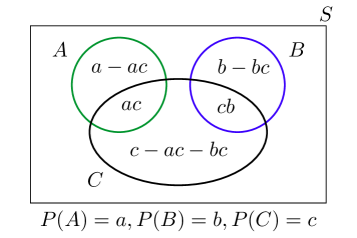


we then get:
$$a + c - ac = {2 \over 3}$$

and:
$$b+c-bc = {3 \over 4}$$

and:
$$a + b+c- ac - bc = {11 \over 12}$$

subtracting the third equation from the sum of the first two we get:

$$\Pr(C) = c = \boxed{1 \over 2}$$

which gives:
$$\Pr(A) = a = \boxed{1 \over 3}$$

and:
$$\Pr(B) = b = \boxed{1 \over 2}$$

## Problem 5

You randomly shuffle a 52-card deck of cards. We will consider what happens 
as we draw 3 cards from the deck to form a sequence of cards (for A and B) or a set of cards (C).
In other words, do we consider the ordering of the cards or not?

Answer each of the following questions, showing all relevant calculations. 
You should analyze these using tree diagrams, but no need to show the diagrams
in your answer. 

(A) Suppose you draw three cards from the deck, observing what card was drawn, and then putting it back in the deck before the next draw (i.e., "with replacement"); what is the probability that the first card is red, the second is a spade, and the third is a face card (Jack, Queen, or King)?  [Hint: these are ordered!]

(B) Suppose you draw three cards from the deck with replacement; what is the probability that the first and third cards have the same color, but the second is a different color?  

(C) Suppose you draw three cards from the deck WITHOUT replacement; what is the probability that you get two cards of one color, and a third card of a different
color?  (In other words, this is the same as (B), but without replacement, and
you don't care about the order of the cards: they are a set.)

[Hint: a tree diagram might be useful.]









<b>Solution:</b>

(A) Since we replace the cards, the three draws are independent, and we can just multiply the probabilities:

$$P(\text{ red}, \text{ spade}, \text{ facecard}) = {26 \over 52}\cdot{13\over 52}\cdot{12\over 52} = \boxed{0.0288}$$

(B) Again, we can just multiply the probabilities, but there are various cases to
consider, since there are 8 possible equiprobable outcomes {BBB, BBR, ...., RRR} and
the event is {BRB,RBR}. Clearly the probability is = $\boxed{0.25}$. 

(C) Now the probabilities are different, and you can do it with a tree diagram or by considering all the possible combinations of red and black that come out, or
by using the Inverse Method:

The possible permutations that could satisfy this constraint are

>        BBR, BRB, RBB, RRB, RBR, BRR

and each has probability ${26\over 52}\cdot{25\over 51}\cdot{26\over 50},$
so

$$6\cdot {26\over 52}\cdot{25\over 51}\cdot{26\over 50} = \boxed{0.7647}.$$

Or, you could use the Inverse Method:
  
$$\begin{aligned}
        P(\text{ two of one color }) &= 1.0 - P(\text{ 3 red }) - P(\text{ 3 black })\\ 
                                     &= 1.0 - 2\cdot{26\over 52}\cdot{25\over 51}\cdot{24\over 50}\cdot\\
                                     &= 0.7647.
  \end{aligned}$$
  
You could also do it with combinations (which we will consider on Tuesday 2/11):

$${ { 2\cdot {26\choose 2}\cdot {26\choose 1}      } \over { 52\choose 3 }} = {0.7647}.$$
             

## Problem 6

You have two bags of colored balls. Bag A contains 3 red and 2 black balls;
and Bag B contains 1 red ball and 5 black balls. Both bags are shaken so that they
are in random order but the bags are kept separate. 

Answer each of the following questions, showing all relevant calculations. 
If necessary, analyze these using a tree diagram, but no need to show the diagram
in your answer unless you like diagrams as much as I do!  


(A) Suppose you draw a ball from Bag A and find it is red; then you draw a ball from Bag B and
find that it is black; you throw all the balls from both bags into a third bag, shake it, and
draw a ball.  What is the probability that it is black?

(B) Suppose you flip a fair coin to choose one of the bags, and then draw one ball. 
What is the probability that it is red?

(C)  Suppose you tell a friend to flip a fair coin to choose one of the bags, and then draw
a ball without telling you which bag it came from; you see that it is red. 
What is the probability that it came from Bag A? 




<b>Solution:</b>

(A)  $\frac{2+4}{4+5} = \boxed{0.6667}$

(B)  $\frac{1}{2}\cdot\frac{3}{5}+\frac{1}{2}\cdot\frac{1}{6} = \boxed{0.3833}$

(C)  

P( Red and From A ) = $\frac{1}{2}\cdot\frac{3}{5}=\frac{3}{10} $;  

P( Red and From B ) = $\frac{1}{2}\cdot\frac{1}{6} = \frac{1}{12}$

P( Red ) = $\frac{3}{10}+\frac{1}{12} = 0.3833$

P( From A | Red ) = $\frac{\frac{3}{10}}{\frac{3}{10}+\frac{1}{12}} = \boxed{0.7826}.$


## Problem 7 

How many distinct (identical-looking) arrangements of the word PROBABILITY are there if:

(A) There are no restrictions other than the one discussed in lecture that the two 'B's look the same and the two 'I's look the same?

(B) The arrangement must begin with a vowel and end in a consonant. 

(C) If you do not change the order of the vowels or consonants, that is, the arrangement must look like
this:

>     ...O...A...I...I...               # the ... represent 0 or more consonants

if you only look at the vowels, and the same arrangement must look like this

>      ...P...R...B...B...L...T...Y...     # the ... represent 0 or more vowels

if you only look at the consonants. 

(D) The arrangement contains the substring `BABY`, that is, it looks like this:

>      ...BABY...              



<b>Solution:</b>

(A)  This is just the usual multinomial calculation:

$${11! \over {2!\cdot 2!}} = {39,916,800\over 4} = \boxed{9,979,200}.$$

(B) We must work out all the cases, accounting for the duplicates
along the way; it is useful to separate the duplicate letters from the others.
Let $C\in\{P,R,L,T,Y\}$ (non-duplicate consonants), and let $V\in\{A,O\}$ (non-duplicate vowels). There are four cases: 

    Duplicates at beginning and end: 
      I X B  with X a permutation of 9 letters (no dups)     
             = 9!

    Duplicate at beginning:
      I X C  with 5 cases of C, and X a permutation of 9 letters (with 2 dup B's) 
             = 5*9!/2!
       
    Duplicate at end:
      V X B  with 2 cases of V, and X a permutation of 9 letters (with 2 dup I's) 
             = 2*9!/2!
       
    No duplicates at either end:
      V X C  with 2 cases of V, 5 cases of C, and X a permutation of 9 letters 
             (with 2 pairs of dups, I and B) 
             = 2*5*9!/(2!*2!)
             
$\text{Solution: }  9! + 5*9!/2! + 2*9!/2! + 2*5*9!/(2!*2!) = \boxed{2,540,160}.$

(C)  There are at least two ways to think about this. You can consider the $11!$ permutations, and then unorder the vowels and unorder the consonants:

$${11!\over 4!\cdot 7!} \,= \,\boxed{330}$$

or you may consider that you have 11 slots for letters:

>      _ _ _ _ _ _ _ _ _ _ _

and you have to choose 4 of them for the vowels (which can then go in only
one order) and fill the remaining 7 with consonants (which can go in only one order):

$${11\choose 4}\,=\, 330.$$

(D) There are at least two ways to think about this. Of the remaining 7 characters you can choose 0 to 7 of them to appear before the `BABY`, and the remaining to follow, hence you have (after dividing by the multiplicity of the remaining `I`'s):

$$\sum_{k=0}^7\, {P(7,k)\cdot P(7-k,7-k)\over 2}\ =\ \boxed{20,160}$$

arrangements.  Another way is to consider that there are $7!/2$ arrangements, and then 8 locations where we could splice the string `BABY` into the sequence of $7$ characters:

$$8\cdot {7!\over 2}\ =\ 20,160.$$

## Problem 8 

In how many ways can 9 people { A, B, C, D, E, F, G, H, I } be seated at a round table if

(A) B and F must not sit next to each other;

(B) G, B, and E must sit together (i.e., no other person can sit between any of these three)?

(C) A and B must sit together, but neither can be seated next to E, F, or G. 

Consider each of these separately. For (C) you may NOT simply list all possibilities, but must use the basic principles we have developed in lecture (you may check your work with a list if you wish). 

Hint: Conceptually, think of the groups of two or three people as one "multi-person" entity in the overall circular arrangement. However, a "multiperson" is an unordered entity, and you will have to think about how many ways a "multiperson" could be ordered. It may help to draw a diagram, fixing a particular person at the top of the circle (thereby eliminating the duplicates due to rotations).

Solution:

(A) We will use the Inverse Method to eliminate all those where B and F are seated together (effectively, being one "multi-person" among 8 persons). In this case there
are ${8!\over 8}$ persons, and 2 ways of arranging the multi-person.  

There are ${9!\over 9}$ total arrangements around the table, so
the answer is

$${9!\over 9} - 2\cdot{8!\over 8} = 40,320 - 10,080 = \boxed{30,240}.$$

(B) The "multi-person" has three people, and so we have $\frac{7!}{7} = 6! = 720$ arrangements including the multi-person, and 3! permutations of the three in the group. Thus 720*6 = $\boxed{4,320}$ ways.

(C) Let's fix the multi-person {AB} (which has 2 arrangements) at a distinguished
position (which removes the necessity to consider all the rotations), and 
then consider the rest of the arrangement. We can in fact just give this
as a string 

     X{AB}Y ....     
     
where $X, Y\in \{C,D,H,I\}$ and the remaining seats are taken by the remaining
persons. Hence

>  There are 2 arrangements of {AB};
>  There are P(4,2) = 12 arrangements of X and Y;
>  There are 5! arrangements of the remaining 5 people. 


Thus, we have $2\cdot 12\cdot 5! = \boxed{2880}$  arrangements. 